In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an optimization method commonly used in neural networks. We will illustrate the concepts with concrete examples.

In [0]:
from fastai.basics import *

### Linear Regression Problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n = 100

In [8]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5651,  1.0000],
        [-0.5294,  1.0000],
        [ 0.5615,  1.0000],
        [-0.4363,  1.0000],
        [-0.1171,  1.0000]])

In [9]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

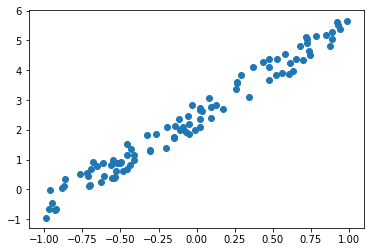

In [13]:
plt.scatter(x[:,0], y)

You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [0]:
def mse(y_hat, y):
  return ((y_hat - y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute y_hat which is our prediction and then compute our error.


In [0]:
a = tensor(-1.,1)

In [21]:
y_hat = x@a
mse(y_hat, y)

tensor(7.1630)

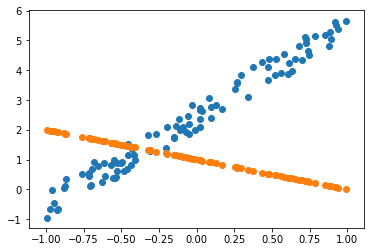

In [22]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for a? How do we find the best fitting linear regression.

#### Gradient Descent

We would like to find the values of a that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in PyTorch.

In [23]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():

  y_hat = x@a
  loss = mse(y_hat, y)
  if t % 10 == 0:
    print(loss)

  loss.backward()

  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()
    



In [25]:
lr = 1e-1
for t in range(100):
  update()

tensor(7.1630, grad_fn=<MeanBackward0>)
tensor(1.5867, grad_fn=<MeanBackward0>)
tensor(0.4748, grad_fn=<MeanBackward0>)
tensor(0.1875, grad_fn=<MeanBackward0>)
tensor(0.1123, grad_fn=<MeanBackward0>)
tensor(0.0926, grad_fn=<MeanBackward0>)
tensor(0.0874, grad_fn=<MeanBackward0>)
tensor(0.0860, grad_fn=<MeanBackward0>)
tensor(0.0857, grad_fn=<MeanBackward0>)
tensor(0.0856, grad_fn=<MeanBackward0>)


RuntimeError: ignored

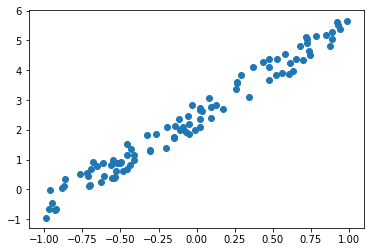

In [26]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);